In [1]:
from common import *
from config import *
from dataloaders import *
from transform_data import *
from model_part_italy import *
from callbacks import *

from functools import partial
from scipy.io import arff
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('data/ItalyPowerDemand_TRAIN.txt', header=None,delim_whitespace=True)
df_test = pd.read_csv('data/ItalyPowerDemand_TEST.txt', header=None, delim_whitespace=True)

In [3]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,-0.710518,-1.183320,-1.372442,-1.593083,-1.467002,-1.372442,-1.088760,0.045967,0.928532,...,-0.647477,-0.269235,-0.206195,0.613330,1.369815,1.464375,1.054613,0.581810,0.172048,-0.269235
1,1.0,-0.993009,-1.426786,-1.579884,-1.605401,-1.630917,-1.375754,-1.018526,-0.355102,0.716583,...,0.486936,0.563485,0.614518,0.308322,0.257289,1.099327,1.048295,0.691066,-0.048906,-0.380618
2,2.0,1.319067,0.569774,0.195128,-0.085856,-0.179518,-0.273180,-0.085856,-1.397118,-1.116134,...,-0.554164,-0.741487,-0.741487,-0.741487,-1.116134,-0.460503,0.476113,2.349344,2.255682,1.600052
3,2.0,-0.812444,-1.157553,-1.416385,-1.531421,-1.502662,-1.416385,-1.646458,-0.467335,0.654269,...,0.740547,0.884342,0.884342,0.683028,0.625510,0.424197,-0.007190,-0.035949,0.107847,-0.266022
4,1.0,-0.972840,-1.390518,-1.536705,-1.620240,-1.620240,-1.453169,-0.993724,0.050469,0.635218,...,0.321960,0.489031,0.614334,1.303502,1.240850,1.073779,0.551682,0.426379,-0.179253,-0.638698


In [4]:
# let's add a categorical variable
countries = ['Germany', 'US']
household_income = ['low', 'high']
df_train["country"] = np.random.choice(countries, len(df_train))
df_test["country"] = np.random.choice(countries, len(df_test))
df_train["household_income"] = np.random.choice(household_income, len(df_train))
df_test["household_income"] = np.random.choice(household_income, len(df_test))

In [5]:
df_train.iloc[:, 1:-2]

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,-0.710518,-1.183320,-1.372442,-1.593083,-1.467002,-1.372442,-1.088760,0.045967,0.928532,1.086133,...,-0.647477,-0.269235,-0.206195,0.613330,1.369815,1.464375,1.054613,0.581810,0.172048,-0.269235
1,-0.993009,-1.426786,-1.579884,-1.605401,-1.630917,-1.375754,-1.018526,-0.355102,0.716583,1.201393,...,0.486936,0.563485,0.614518,0.308322,0.257289,1.099327,1.048295,0.691066,-0.048906,-0.380618
2,1.319067,0.569774,0.195128,-0.085856,-0.179518,-0.273180,-0.085856,-1.397118,-1.116134,-0.741487,...,-0.554164,-0.741487,-0.741487,-0.741487,-1.116134,-0.460503,0.476113,2.349344,2.255682,1.600052
3,-0.812444,-1.157553,-1.416385,-1.531421,-1.502662,-1.416385,-1.646458,-0.467335,0.654269,1.056896,...,0.740547,0.884342,0.884342,0.683028,0.625510,0.424197,-0.007190,-0.035949,0.107847,-0.266022
4,-0.972840,-1.390518,-1.536705,-1.620240,-1.620240,-1.453169,-0.993724,0.050469,0.635218,1.032011,...,0.321960,0.489031,0.614334,1.303502,1.240850,1.073779,0.551682,0.426379,-0.179253,-0.638698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,-1.037930,-1.301658,-1.469485,-1.589361,-1.613336,-1.517435,-1.061905,-0.006993,1.215746,1.143820,...,0.424562,0.448537,0.448537,0.304686,0.448537,1.215746,0.664315,0.352636,-0.102894,-0.510474
63,-0.373579,-0.986632,-1.446422,-1.676316,-1.752948,-1.369790,-0.910000,-0.986632,-0.220316,0.852527,...,0.469369,0.775895,0.929158,0.392737,0.162842,0.009579,-0.373579,1.312316,0.929158,-0.067053
64,-1.159152,-1.301400,-1.524933,-1.565575,-1.606217,-1.443648,-1.077867,0.019474,0.730715,1.177780,...,0.710393,0.486861,0.446218,0.486861,0.263328,0.893284,0.669751,0.466540,-0.122774,-0.651123
65,-0.694919,-1.235829,-1.416133,-1.506285,-1.506285,-1.506285,-1.055526,-1.010450,-0.063857,1.108115,...,0.612280,1.063039,0.927811,0.612280,0.251673,0.161522,0.026294,0.657356,0.206598,-0.199085


In [6]:
x_train = df_train.iloc[:, 1:-2].values.reshape(-1, 1, 24)
x_test = df_test.iloc[:, 1:-2].values.reshape(-1, 1, 24)

y_train = df_train.iloc[:, 0].values-1
y_test = df_test.iloc[:, 0].values-1

emb_vars_train = df_train.iloc[:, -2:].values
emb_vars_test = df_test.iloc[:, -2:].values

In [7]:
emb_vars_train, emb_vars_test, dict_embs, dict_inv_embs = cat_transform(emb_vars_train, emb_vars_test)


In [8]:
device = DEVICE
datasets = create_datasets(x_train, emb_vars_train, y_train,
             x_test, emb_vars_test, y_test,
             valid_pct=VAL_SIZE, seed=1234)
data = DataBunch(*create_loaders(datasets, bs=1024))

In [9]:
raw_feat = x_train.shape[1]
emb_dims = [(len(dict_embs[0]), EMB_DIMS), (len(dict_embs[1]), EMB_DIMS)]

num_classes = 2

In [10]:
model = Classifier_CNN_small(raw_feat, emb_dims, num_classes).to(device)
opt = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

In [11]:
model

Classifier_CNN_small(
  (raw): Sequential(
    (0): Conv1d(1, 128, kernel_size=(23,), stride=(1,))
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Flatten()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU(inplace=True)
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=64, out_features=64, bias=True)
    (8): ReLU(inplace=True)
  )
  (embeddings): ModuleList(
    (0): Embedding(2, 5)
    (1): Embedding(2, 5)
  )
  (emb_out): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
  )
  (out): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=2, bias=True)
  )
)

If we want to check to which value we should set our learning rate, we can use the handy *LR_Find* Callback:

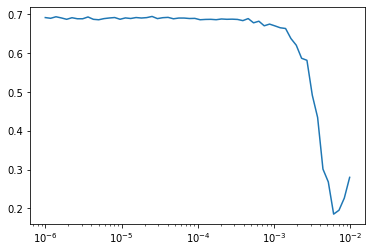

In [12]:
learn = Learner(model, opt, loss_func, data)
run = Runner(cb_funcs=[LR_Find, Recorder])
run.fit(1000, learn)
run.recorder.plot(skip_last=5)

So our learning rate should be ideally somewhere around 2e-3:

In [14]:
cbfs = [Recorder, partial(AvgStatsCallback,adjusted_accu)]
model = Classifier_CNN_small(raw_feat, emb_dims, num_classes).to(device)
opt = optim.Adam(model.parameters(), lr=2e-3)
learn = Learner(model, opt, loss_func, data)
run = Runner(cb_funcs=cbfs)
run.fit(30, learn)

train: [0.6898276131108122, tensor(0.5283)]
valid: [0.6995464733668736, tensor(0.4286)]
train: [0.6861856568534419, tensor(0.5283)]
valid: [0.684891973223005, tensor(0.5000)]
train: [0.6782473438190963, tensor(0.5660)]
valid: [0.6716748646327427, tensor(0.5714)]
train: [0.6653764112940375, tensor(0.6415)]
valid: [0.658198424748012, tensor(0.5714)]
train: [0.664700706050081, tensor(0.6038)]
valid: [0.6428552355085101, tensor(0.5714)]
train: [0.6674122360517394, tensor(0.6038)]
valid: [0.6250144413539341, tensor(0.5714)]
train: [0.6411245813909566, tensor(0.6792)]
valid: [0.6064740589686802, tensor(0.5714)]
train: [0.6345404858859081, tensor(0.6604)]
valid: [0.5841319220406669, tensor(0.7143)]
train: [0.6129934922704157, tensor(0.6604)]
valid: [0.5580510411943708, tensor(0.7143)]
train: [0.5784456864842829, tensor(0.7547)]
valid: [0.5291423116411481, tensor(0.7143)]
train: [0.5652149488341134, tensor(0.7547)]
valid: [0.49724899019513813, tensor(0.7143)]
train: [0.5319615130154591, tensor

In [15]:
outs = run.predict(learn)

In [16]:
(outs == y_test).mean()

0.9572400388726919

Let's look at our embeddings. We defined to have 5 embeddings for each categorical variable:

In [17]:
model.embeddings[0].weight

Parameter containing:
tensor([[-0.2240,  0.1337, -2.1963,  0.2495, -0.5241],
        [-0.6942,  1.7485, -0.5922,  0.6028,  0.3194]], requires_grad=True)

In [18]:
model.embeddings[1].weight

Parameter containing:
tensor([[-0.6631, -0.3797,  0.1878,  0.6988,  0.2954],
        [-0.2556,  1.0189, -1.0607, -1.5518, -0.0505]], requires_grad=True)